In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/PGSS2023/PGSS2023--ClassDrive/Week02/IMDB Dataset.csv")

In [ ]:
# Distribution of each type of review
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Cleanse text data





In [ ]:
# Convert all words to lowercase
df["review"] = df["review"].str.lower()

# Remove HTML tags using Beautiful soup
from bs4 import BeautifulSoup
df["review"] = df["review"].apply(lambda review: BeautifulSoup(review, "lxml").text)

# Remove urls
# From https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
import re
df["review"] = df["review"].apply(lambda review: re.sub(r'^https?:\/\/.*[\r\n]*', '', review, flags=re.MULTILINE))

df.head()

<ipython-input-5-6e751ea85957>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["review"] = df["review"].apply(lambda review: BeautifulSoup(review, "lxml").text)


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 17.2 MB/s eta 0:00:00


In [ ]:
# Remove Contractions
import contractions
df["review"] = df["review"].apply(lambda review: contractions.fix(review))

Classify text after converting response variable

In [ ]:
#Create Word Cloud
from wordcloud import WordCloud, STOPWORDS

all_reviews = " "
positive_reviews = " "
negative_reviews =  ""

stopwords = set(STOPWORDS)


positive_df = df[df["sentiment"]  == "positive"]
negative_df = df[df["sentiment"]  == "negative"]

for review in positive_df.review:
    # Tokenize the review
    tokens = review.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    all_reviews += " ".join(tokens)+" "
    positive_reviews  += " ".join(tokens)+" "

for review in negative_df.review:
    # Tokenize the review
    tokens = review.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    all_reviews += " ".join(tokens)+" "
    negative_reviews  += " ".join(tokens)+" "


In [ ]:
type(all_reviews)

str

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_reviews)


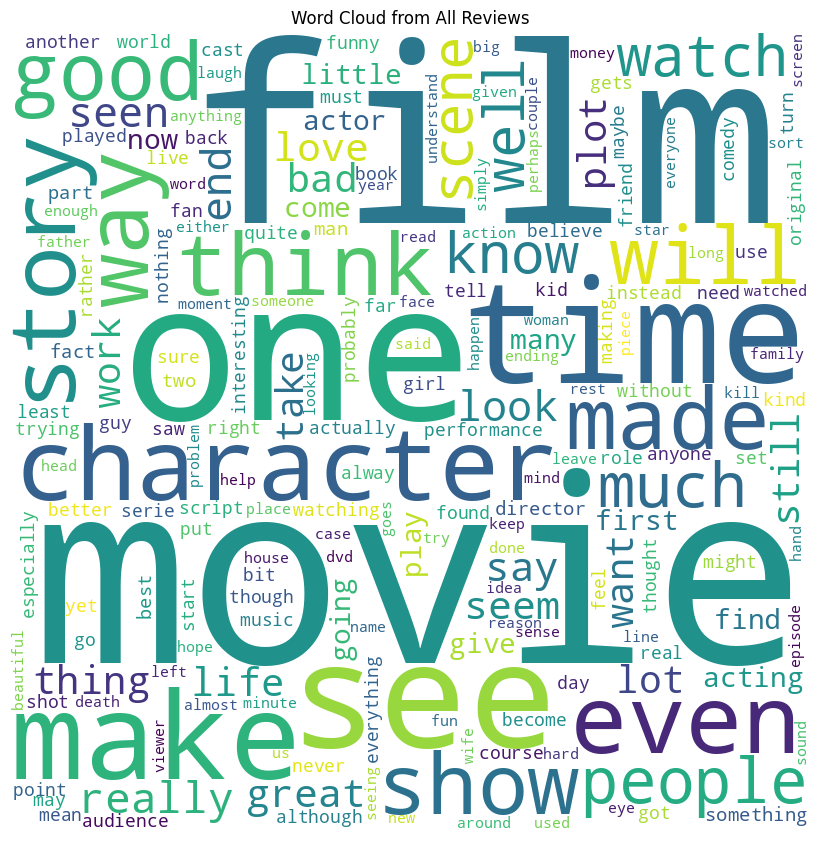

In [ ]:
# plot the WordCloud image

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud from All Reviews")
plt.show()


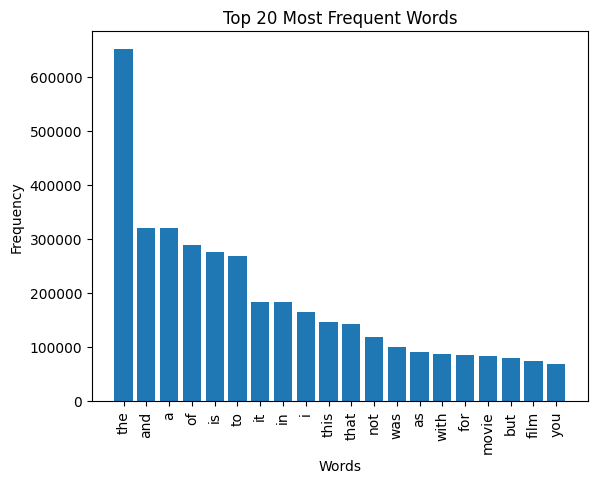

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt


def create_barplot(string, k):
    # Step 1: Convert string to list of words
    words = string.split()

    # Step 2: Remove punctuation and special characters
    words = [re.sub(r'[^\w\s]', '', word) for word in words]

    # Step 3: Convert all words to lowercase
    words = [word.lower() for word in words]

    # Step 4: Count frequency of each word using dictionary
    word_counts = Counter(words)

    # Step 5: Sort dictionary by value in descending order and limit to top k
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:k])

    # Step 6: Create barplot using matplotlib
    plt.bar(sorted_word_counts.keys(), sorted_word_counts.values())
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {k} Most Frequent Words')
    plt.show()

k = 20

create_barplot(all_reviews, k)

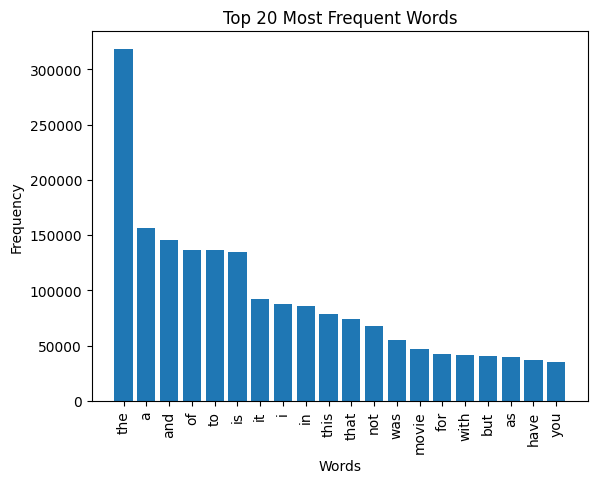

In [ ]:
k = 20

create_barplot(negative_reviews, k)

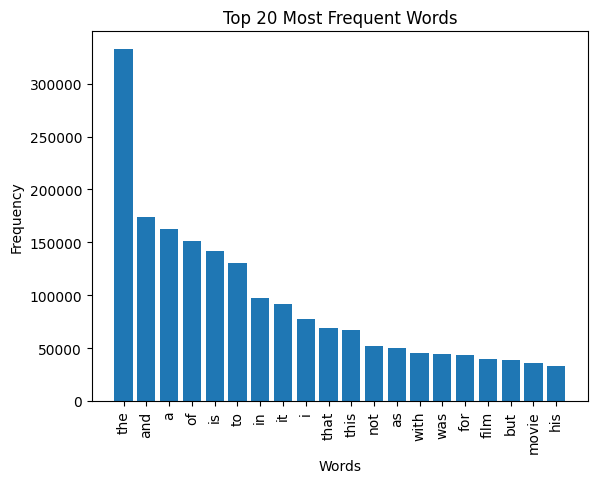

In [ ]:
k = 20

create_barplot(positive_reviews, k)

In [ ]:
# Define a function to count the number of words in a string
def count_words(text):
    return len(text.split())

# Apply the function to the reviews column using apply method
df['num_words'] = df['review'].apply(count_words)

# Create a new column in the dataframe with the number of words
df.head()

,review,sentiment,num_words
0,one of the other reviewers has mentioned that ...,positive,308
1,a wonderful little production. the filming tec...,positive,156
2,i thought this was a wonderful way to spend ti...,positive,164
3,basically there is a family where a little boy...,negative,135
4,"petter mattei's ""love in the time of money"" is...",positive,222


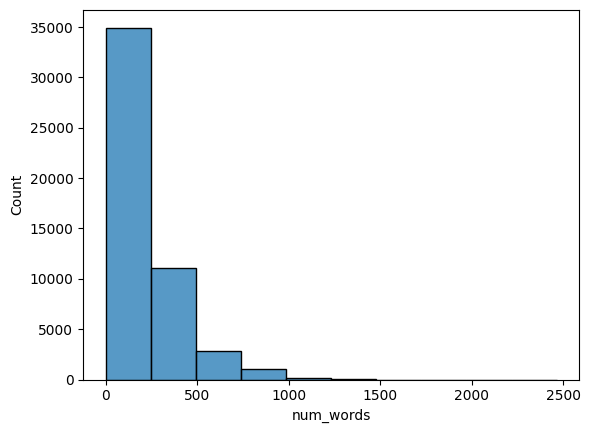

In [ ]:
import seaborn as sns

# Create a histogram using seaborn's histplot function
sns.histplot(data=df, x='num_words', bins=10)

# Display the plots
plt.show()

<Axes: xlabel='num_words', ylabel='Density'>

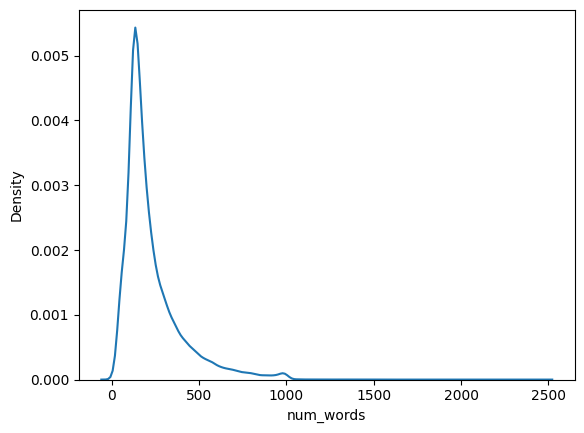

In [ ]:

# Create a KDE plot using seaborn's kdeplot function
sns.kdeplot(data=df, x='num_words')


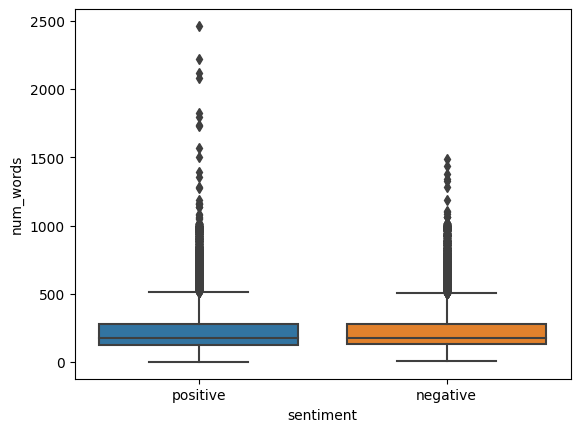

In [ ]:
#  Create a grouped boxplot using seaborn's boxplot function
sns.boxplot(data=df, x='sentiment', y='num_words')

# Display the plot
plt.show()

## Create new numerical features in addition to the num_words, using sentence transformers to embed the text into fixed-length numerical representations

In [ ]:
! pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=b229c54bb9bcf43147d80db6348dd8938f3f671960b0b4b4521fd0b36575fd90
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
# Create a stratified random sample of df
strata = df['sentiment'].unique()

# Calculate the size of the sample for each stratum
sample_size = 2
sample_sizes = {s: sample_size for s in strata}

# Use pandas' groupby method to group the dataframe by the sentiment column
groups = df.groupby('sentiment')

# Use pandas' apply method to sample each group based on the size of the sample for that stratum
samples = groups.apply(lambda x: x.sample(n=sample_sizes[x.name])).reset_index(drop=True)

# Concatenate the sampled groups into a single dataframe
sampled_df = pd.concat([samples])

sampled_df

,review,sentiment,num_words
0,"the last of the ""airport"" sequels. this has al...",negative,271
1,"""everything a great documentary could be""?? ye...",negative,150
2,"this is a great, dark, offbeat little film, a ...",positive,53
3,the problem with so many people watching this ...,positive,326


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
# model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('bert-base-nli-mean-tokens', device='cuda')

# Define a function to embed the text using the sentence transformer model
def embed_text(text):
    embeddings = model.encode(text)
    return embeddings.tolist()

# Apply the function to the reviews column using apply method
sampled_df['embeddings'] = sampled_df['review'].apply(embed_text)

sampled_df

,review,sentiment,num_words,embeddings
0,"the last of the ""airport"" sequels. this has al...",negative,271,"[-0.6713495254516602, 1.165510654449463, 0.267..."
1,"""everything a great documentary could be""?? ye...",negative,150,"[0.19654135406017303, 1.2138746976852417, 0.72..."
2,"this is a great, dark, offbeat little film, a ...",positive,53,"[-0.009415660053491592, 0.4669242799282074, 0...."
3,the problem with so many people watching this ...,positive,326,"[-0.05119806155562401, 0.7494622468948364, 0.1..."


In [ ]:
df_embeddings = pd.DataFrame(list(sampled_df['embeddings']))

sampled_df = pd.concat([sampled_df, df_embeddings], axis=1)
sampled_df.drop(['embeddings'], axis=1, inplace=True)

# df_model = sampled_df[['num_words', 0, 1, ..., 767]]

sampled_df

,review,sentiment,num_words,0,1,2,3,4,5,6,...,758,759,760,761,762,763,764,765,766,767
0,"the last of the ""airport"" sequels. this has al...",negative,271,-0.671350,1.165511,0.267417,0.178644,0.064852,-0.727720,0.291476,...,-0.937301,-0.435195,-1.259938,-1.330516,0.347196,-0.886198,-0.234383,0.169993,0.778584,0.093597
1,"""everything a great documentary could be""?? ye...",negative,150,0.196541,1.213875,0.721169,0.381332,-0.319893,-1.278082,0.948838,...,-0.310451,-0.071011,-0.631884,-2.074583,-0.217394,0.097753,0.414202,0.508166,0.966093,0.197393
2,"this is a great, dark, offbeat little film, a ...",positive,53,-0.009416,0.466924,0.581132,0.129797,0.126928,-1.404454,0.226574,...,-0.240373,-1.007770,-1.053136,-1.420344,0.266188,-0.657209,0.319651,0.665548,0.546879,0.380623
3,the problem with so many people watching this ...,positive,326,-0.051198,0.749462,0.134713,0.060302,-0.384232,-0.852194,1.719702,...,-0.175170,-0.222896,-0.873531,-1.766760,-0.334716,-0.183814,0.241852,0.346898,0.702917,0.291926


In [ ]:
modelReadDataset = sampled_df.drop(['review'], axis=1)
modelReadDataset['sentiment'] = modelReadDataset['sentiment'].astype('category')
modelReadDataset

,sentiment,num_words,0,1,2,3,4,5,6,7,...,758,759,760,761,762,763,764,765,766,767
0,negative,271,-0.671350,1.165511,0.267417,0.178644,0.064852,-0.727720,0.291476,-0.361878,...,-0.937301,-0.435195,-1.259938,-1.330516,0.347196,-0.886198,-0.234383,0.169993,0.778584,0.093597
1,negative,150,0.196541,1.213875,0.721169,0.381332,-0.319893,-1.278082,0.948838,-0.036592,...,-0.310451,-0.071011,-0.631884,-2.074583,-0.217394,0.097753,0.414202,0.508166,0.966093,0.197393
2,positive,53,-0.009416,0.466924,0.581132,0.129797,0.126928,-1.404454,0.226574,0.680267,...,-0.240373,-1.007770,-1.053136,-1.420344,0.266188,-0.657209,0.319651,0.665548,0.546879,0.380623
3,positive,326,-0.051198,0.749462,0.134713,0.060302,-0.384232,-0.852194,1.719702,-0.153501,...,-0.175170,-0.222896,-0.873531,-1.766760,-0.334716,-0.183814,0.241852,0.346898,0.702917,0.291926


## Classify the text after converting the response variable into a categorical type

In [ ]:
# Create a decision tree to classify sentiment using the remaining columns of modelReadDataset
modelReadDataset = modelReadDataset.drop(['num_words'], axis=1)

from sklearn.model_selection import train_test_split

X = modelReadDataset.drop('sentiment', axis=1)
y = modelReadDataset['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)